In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.backend import set_image_data_format 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input 
from tensorflow.keras import optimizers, losses, utils 
#from livelossplot import keras_plot

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
X=[]
y=[]

In [6]:

files = glob.glob("data/Highway/*.jpg")
for file in files:
    img = np.asarray(Image.open(file))
    X.append(img)
    y.append('Highway')

In [7]:
X=np.asarray(X)

In [8]:
X.shape

(5500, 64, 64, 3)

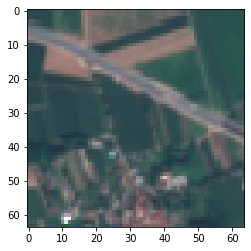

In [10]:
plt.imshow(X[4567].reshape(64, 64,3),cmap='Greens')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [15]:
le.classes_

array(['Forest', 'Highway'], dtype='<U7')

In [16]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(64, 64, 3)))
cnn_model.add(Conv2D(filters = 6,            
                     kernel_size = 3,       
                     activation='relu'),
                    
             )
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,
                     kernel_size=2,
                     activation='relu'),
                
             )
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(len(le.classes_) - 1, activation='sigmoid'))

In [17]:

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = cnn_model.fit( X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
            
                    epochs=15,
                    verbose=1)

Train on 4400 samples, validate on 1100 samples
Epoch 1/15
4400/4400 [==============================] - 6s 1ms/sample - loss: 3.0737 - accuracy: 0.6414 - val_loss: 0.3385 - val_accuracy: 0.9200
Epoch 2/15
4400/4400 [==============================] - 5s 1ms/sample - loss: 0.3396 - accuracy: 0.9316 - val_loss: 0.1136 - val_accuracy: 0.9791
Epoch 3/15
4400/4400 [==============================] - 5s 1ms/sample - loss: 0.0935 - accuracy: 0.9732 - val_loss: 0.0786 - val_accuracy: 0.9782
Epoch 4/15
4400/4400 [==============================] - 5s 1ms/sample - loss: 0.0628 - accuracy: 0.9793 - val_loss: 0.0624 - val_accuracy: 0.9818
Epoch 5/15
4400/4400 [==============================] - 5s 1ms/sample - loss: 0.0459 - accuracy: 0.9843 - val_loss: 0.0629 - val_accuracy: 0.9773
Epoch 6/15
4400/4400 [==============================] - 5s 1ms/sample - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.0665 - val_accuracy: 0.9755
Epoch 7/15
4400/4400 [==============================] - 5s 1ms/sample - loss

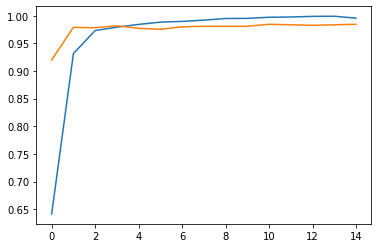

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
img = Image.open('try.png')

In [21]:
img =img.convert('RGB')

In [22]:
img_temp=img.resize((64,64))

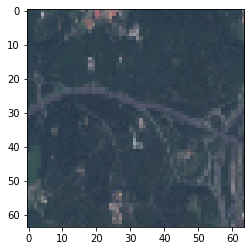

In [23]:
plt.imshow(img_temp)

In [24]:
img=np.asarray(img_temp)
img=img.reshape(1, 64,64,3)

In [28]:
cnn_model.predict(img)

array([[0.99999964]], dtype=float32)

In [29]:
le.inverse_transform([1])

array(['Highway'], dtype='<U7')